In [163]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [165]:
df = pd.read_csv('force2020_data.csv')

In [166]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342
...,...,...,...,...,...,...
18265,2.630211,19.418915,3271.416,0.187811,NaN,NaN
18266,2.643114,21.444370,3271.568,0.185574,NaN,NaN
18267,2.681300,22.646879,3271.720,0.176074,NaN,NaN
18268,2.738337,22.253584,3271.872,0.174617,NaN,NaN


In [167]:
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.133532,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.315346,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.506343,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


In [168]:
df.isna().sum()

RHOB           0
GR             0
DEPTH_MD       0
NPHI        4238
PEF         1830
DTC           81
dtype: int64

In [169]:
df['NPHI'] = df['NPHI'].fillna(df['NPHI'].mean())

In [170]:
df['PEF'] = df['PEF'].fillna(df['PEF'].mean())

In [171]:
df['DTC'] = df['DTC'].fillna(df['DTC'].mean())

In [172]:
df.isna().sum()

RHOB        0
GR          0
DEPTH_MD    0
NPHI        0
PEF         0
DTC         0
dtype: int64

In [173]:
def remove_outliers(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    lb = q1 - 1.5 * iqr
    ub = q3 + 1.5 * iqr
    df[col] = df[col].clip(upper=ub)
    df[col] = df[col].clip(lower=lb)
    return df[col]

In [183]:
for col in df.columns:
    remove_outliers(df, col)

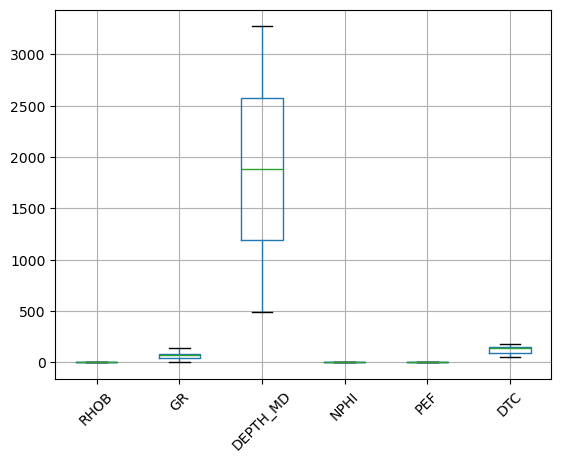

In [185]:
df.boxplot()
plt.xticks(rotation=45)
plt.show()

In [187]:
minmax_scaler  = MinMaxScaler(feature_range=(0,1))
df[['RHOB','GR','DEPTH_MD','PEF','DTC']] = minmax_scaler.fit_transform(df[['RHOB','GR','DEPTH_MD','PEF','DTC']])
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,0.314847,0.561250,0.000000,0.404547,1.000000,0.876716
1,0.318528,0.554137,0.000055,0.404547,1.000000,0.872327
2,0.322946,0.520460,0.000109,0.404547,1.000000,0.868752
3,0.319919,0.505724,0.000164,0.404547,1.000000,0.868550
4,0.312121,0.497005,0.000219,0.404547,1.000000,0.868375
...,...,...,...,...,...,...
18265,0.804586,0.100310,0.999781,0.187811,0.440235,0.577073
18266,0.813056,0.115670,0.999836,0.185574,0.440235,0.577073
18267,0.838124,0.124789,0.999891,0.176074,0.440235,0.577073
18268,0.875567,0.121807,0.999945,0.174617,0.440235,0.577073


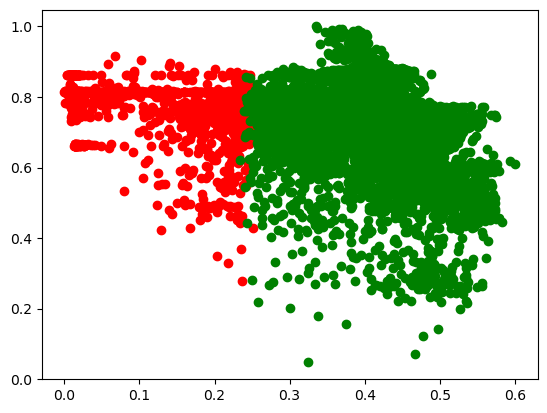

In [189]:
colors = ['r','g']
for i in range(2):
    cluster_data = X[y_kmeans ==i]
    plt.scatter(cluster_data['RHOB'],
              cluster_data['DTC'],
              c=colors[i])


In [190]:
from sklearn.cluster import KMeans

In [193]:
X = df[['RHOB','DTC']]
X.head(3)

,RHOB,DTC
0,0.314847,0.876716
1,0.318528,0.872327
2,0.322946,0.868752


In [195]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++',
                  max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
    
  wcss.append(kmeans.inertia_)

In [196]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)

y_kmeans = kmeans.fit_predict(X)

In [197]:
df['Cluster'] = y_kmeans
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Cluster
0,0.314847,0.561250,0.000000,0.404547,1.0,0.876716,3
1,0.318528,0.554137,0.000055,0.404547,1.0,0.872327,3
2,0.322946,0.520460,0.000109,0.404547,1.0,0.868752,3
3,0.319919,0.505724,0.000164,0.404547,1.0,0.868550,3
4,0.312121,0.497005,0.000219,0.404547,1.0,0.868375,3


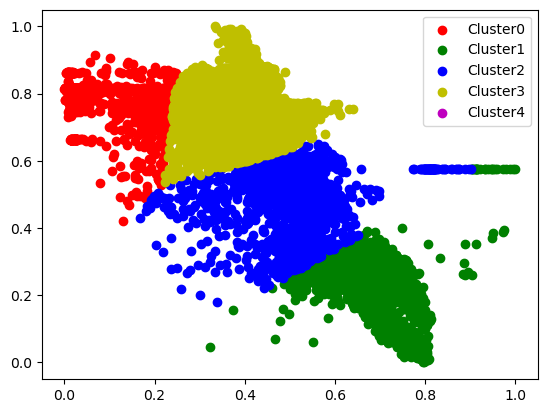

In [198]:
colors = ['r','g','b','y','m']

for i in range(5):
  cluster_data = X[y_kmeans ==i]
  plt.scatter(cluster_data['RHOB'],
              cluster_data['DTC'],
              c=colors[i],
              label = f'Cluster{i}')
  plt.legend()

In [202]:
def predict_cluster(RHOB,NPHI):
  new_data = [[RHOB,NPHI]]
  cluster = kmeans.predict(new_data)
  return cluster[0]

In [204]:
new_RHOB = 290
new_NPFI = 24

predicted_cluster = predict_cluster(new_RHOB,new_NPFI)
print(f'The rock belongs to cluster: {predicted_cluster}')

The rock belongs to cluster: 1


C:\Users\madha\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [207]:
from sklearn.metrics import silhouette_score
silhouette_avg1 = silhouette_score(X, y_kmeans)
print(silhouette_avg1)

0.5771013268378922
